### **Objective:** 
To understand and gain insights from a retail dataset by performing various exploratory data analyses, data visualization, and data modelling.

### **Dataset Columns:**

- **InvoiceNo:** Invoice number. A unique number per invoice.
- **StockCode:** Product code. A unique number per product.
- **Description:** Product description.
- **Quantity:** The number of products sold per invoice.
- **InvoiceDate:** The date and time of the invoice.
- **UnitPrice:** The price of one unit of the product.
- **CustomerID:** Customer identification number.
- **Country:** The country where the customer resides.


## 1. Data Preprocessing and Cleaning:


1.1. Import necessary libraries and read the dataset:

In [1]:
import pandas as pd
import chardet

file_name = 'Sales_data.csv'

# Detect the encoding of the CSV file
with open(file_name, 'rb') as file:
    result = chardet.detect(file.read())

print(result)

data = pd.read_csv(file_name, encoding=result['encoding'])

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
data.describe(include='number').T


,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [4]:
data.describe(include='O').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


1.2. Display the top 10 rows of the dataframe:

In [5]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


1.3. Check for missing values:



In [6]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
#remove NAs from data
data = data[data['CustomerID'].notna()]

In [8]:
#changing the type of customerID to integer from float
data['CustomerID'] = data['CustomerID'].astype('int')

In [9]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

1.4. Convert the InvoiceDate column to datetime format:



In [10]:
data['InvoiceDate'] = data['InvoiceDate'].astype('datetime64[ns]')

1.5. Add a new column 'TotalPrice' to the dataframe which is the product of 'UnitPrice' and 'Quantity':



In [11]:
data['TotalPrice'] = data['UnitPrice'] * data['Quantity']

## 2. Exploratory Data Analysis:


2.1. How many unique products are there in the dataset?


In [12]:
data['StockCode'].nunique()

3684

2.2. Which are the top 10 products (using StockCode) sold by quantity?



In [13]:
data.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)

StockCode
84077     53215
22197     48712
85099B    45066
84879     35314
85123A    34204
21212     33409
23084     27094
22492     25880
22616     25321
21977     24163
Name: Quantity, dtype: int64

2.3. How many unique customers are there in the dataset?



In [14]:
data['CustomerID'].nunique()

4372

2.4. Which country has the maximum number of unique customers?



In [15]:
data.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).head(1)

Country
United Kingdom    3950
Name: CustomerID, dtype: int64

In [16]:
data['Country'].value_counts().head(1)

Country
United Kingdom    361878
Name: count, dtype: int64

2.5. Visualize the distribution of 'TotalPrice' using a histogram.



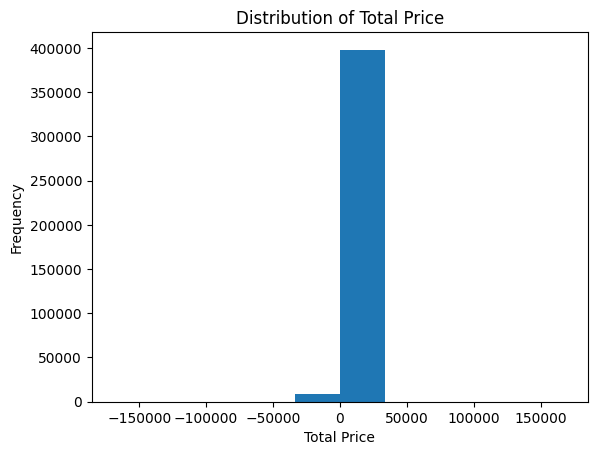

In [17]:
import matplotlib.pyplot as plt

# Create a histogram
plt.hist(data['TotalPrice'])

# Label and add a title
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.title('Distribution of Total Price')

# Show the plot
plt.show()


## 3. Data Aggregation:


3.1. Compute the total sales (TotalPrice) per country.



In [18]:
data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

Country
United Kingdom          6767873.394
Netherlands              284661.540
EIRE                     250285.220
Germany                  221698.210
France                   196712.840
Australia                137077.270
Switzerland               55739.400
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29059.810
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Singapore                  9120.390
Poland                     7213.140
Israel                     6994.250
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Unspecified                2667.070
Malta                      2505.470
United Arab Emirates

3.2. Identify the month in which the sales were highest.



In [19]:
#create a new column for month information
data['InvoiceMonth'] = pd.DatetimeIndex(data['InvoiceDate']).month_name()

#finding the month for which sales were the highest
sales_highest_month = data.groupby('InvoiceMonth')['TotalPrice'].sum().sort_values(ascending=False)

print(f"The Month with highest sales is {sales_highest_month.head(1).index[0]}")

The Month with highest sales is November


3.3. Compute the average unit price per product.



In [20]:
data.groupby('StockCode')['TotalPrice'].mean().sort_values(ascending=False).reset_index().rename(columns={'TotalPrice': 'Average Unit Price per product'})

,StockCode,Average Unit Price per product
0,47556B,3022.500000
1,DOT,744.147500
2,22833,625.882500
3,21897,625.410000
4,22275,527.850000
...,...,...
3679,21645,-39.600000
3680,79323W,-54.000000
3681,D,-73.976883
3682,M,-125.560129


3.4. Compute the total quantity sold per customer.



In [21]:
data.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).reset_index().rename(columns={'TotalPrice' : 'Total Quantity sold per Customer'})

,CustomerID,Total Quantity sold per Customer
0,14646,279489.02
1,18102,256438.49
2,17450,187482.17
3,14911,132572.62
4,12415,123725.45
...,...,...
4367,12503,-1126.00
4368,17603,-1165.30
4369,14213,-1192.20
4370,15369,-1592.49


## 4. Data Visualization:


4.1. Create a bar chart showcasing the sales (TotalPrice) for each country.



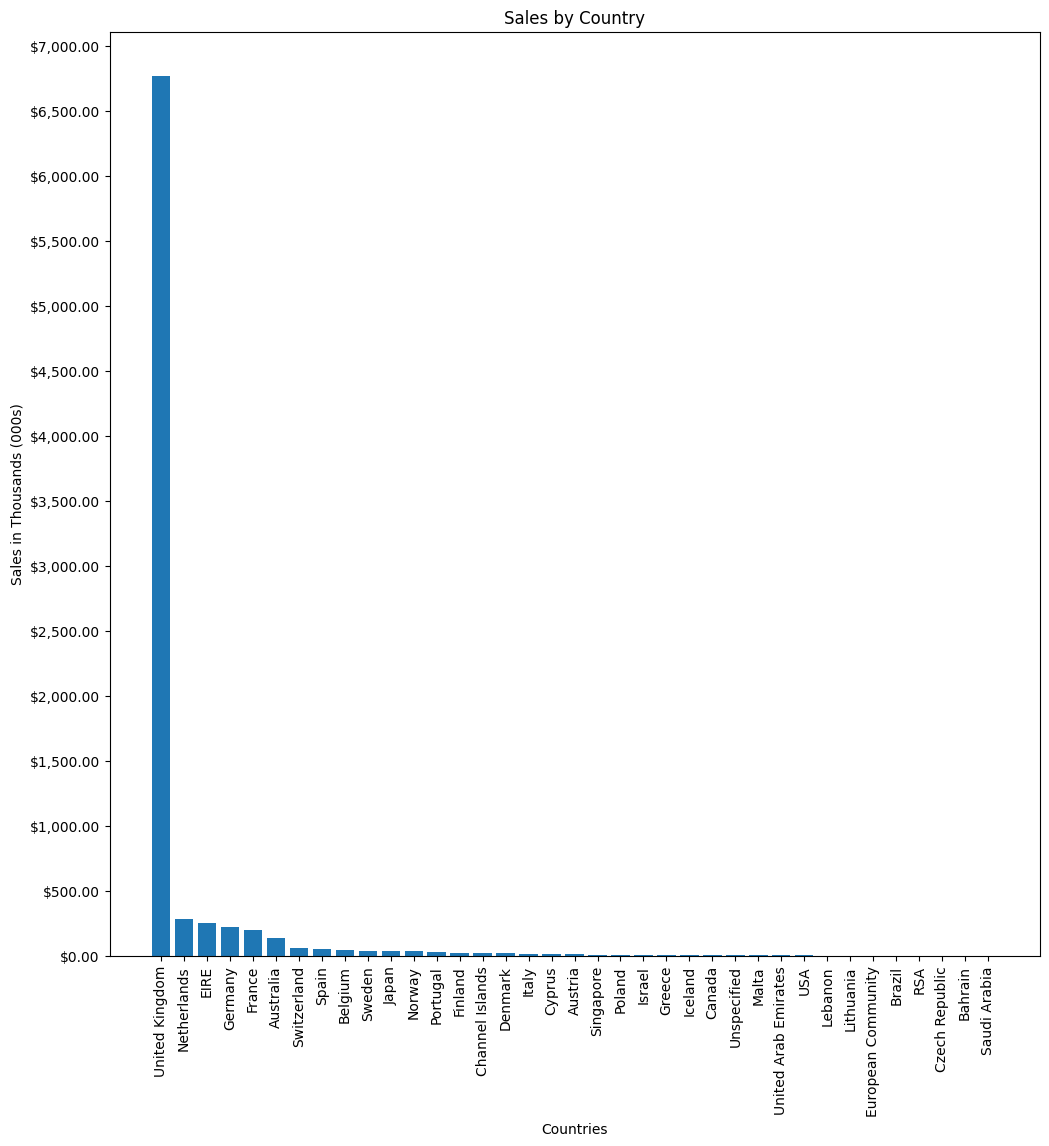

In [22]:
from matplotlib.ticker import MultipleLocator

sales_by_country = data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).reset_index().rename(columns={'TotalPrice' : 'Sales'})

sales_by_country

# Divide the Sales values by 1000 to show in thousands (K)
sales_by_country['Sales (K)'] = sales_by_country['Sales'] / 1000

# Set the figure size (width, height) in inches
plt.figure(figsize=(12, 12))

# Create a bar chart
plt.bar(sales_by_country['Country'], sales_by_country['Sales (K)'])


# Label your axes and add a title
plt.xlabel('Countries')
plt.ylabel('Sales in Thousands (000s)')
plt.title('Sales by Country')

# Rotate the x-axis labels for better visibility (optional)
plt.xticks(rotation=90)

# Format y-axis labels as dollars
plt.gca().get_yaxis().set_major_formatter('${:,.2f}'.format)
plt.gca().yaxis.set_major_locator(MultipleLocator(500))

# Show the plot
plt.show()


4.2. Plot a line graph to showcase the trend of sales over time.



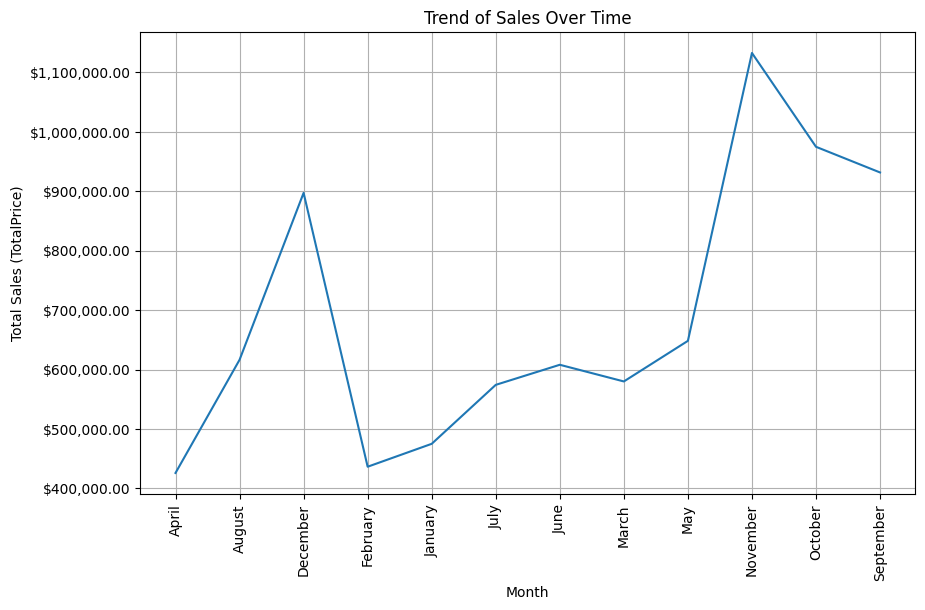

In [23]:
# Create the line graph
plt.figure(figsize=(10, 6))

sales_per_month = data.groupby('InvoiceMonth')['TotalPrice'].sum()

sales_per_month = sales_per_month.reset_index()


plt.plot(sales_per_month['InvoiceMonth'], sales_per_month['TotalPrice'], linestyle='-')

plt.xlabel('Month')

plt.ylabel('Total Sales (TotalPrice)')
plt.title('Trend of Sales Over Time')

# Format y-axis labels as dollars
plt.gca().get_yaxis().set_major_formatter('${:,.2f}'.format)
plt.gca().yaxis.set_major_locator(MultipleLocator(100000))

plt.xticks(rotation=90)
plt.grid(True)  # Add a grid

plt.show()

4.3. Use a scatter plot to visualize the relationship between UnitPrice and Quantity.



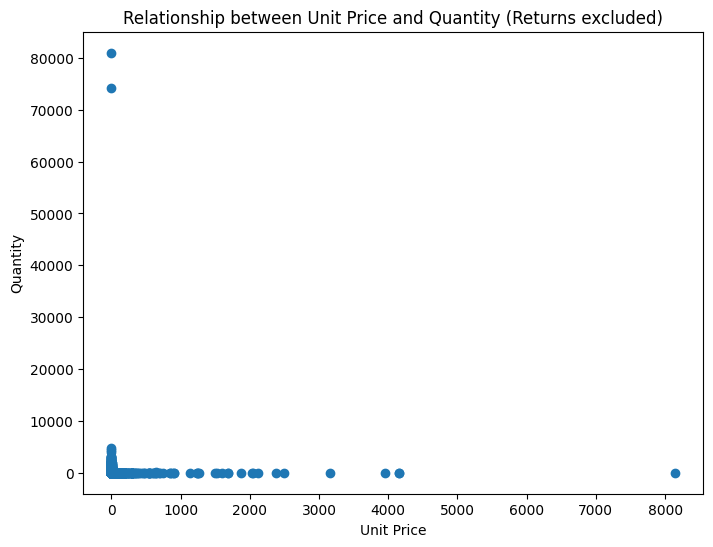

In [24]:
# Create a scatter plot
plt.figure(figsize=(8, 6))

#create a df to store only sales data without returns
unit_price_non_returns = data.loc[data['TotalPrice'] > 0]

plt.scatter(unit_price_non_returns['UnitPrice'], unit_price_non_returns['Quantity'])

# Label your axes and add a title
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.title('Relationship between Unit Price and Quantity (Returns excluded)')

# Show the plot
plt.show()

4.4. Plot a heatmap to display the correlation between numeric columns.



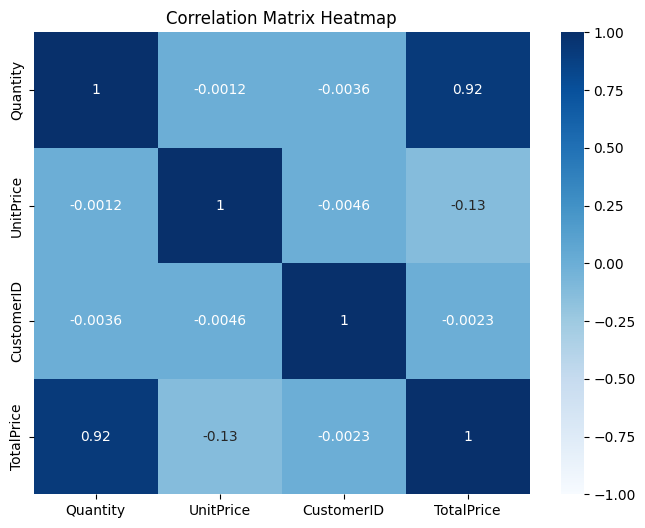

In [25]:
import seaborn as sns
# Calculate the correlation matrix
data_numeric = data.select_dtypes('number')

correlation_matrix = data_numeric.corr()

# Create a heatmap for the correlation matrix with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

## 5. Advanced Analysis:


5.1. Identify potential outliers in the dataset for the Quantity and UnitPrice columns using appropriate visualization techniques.



In [26]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,December
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,December
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,December
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,December
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,December


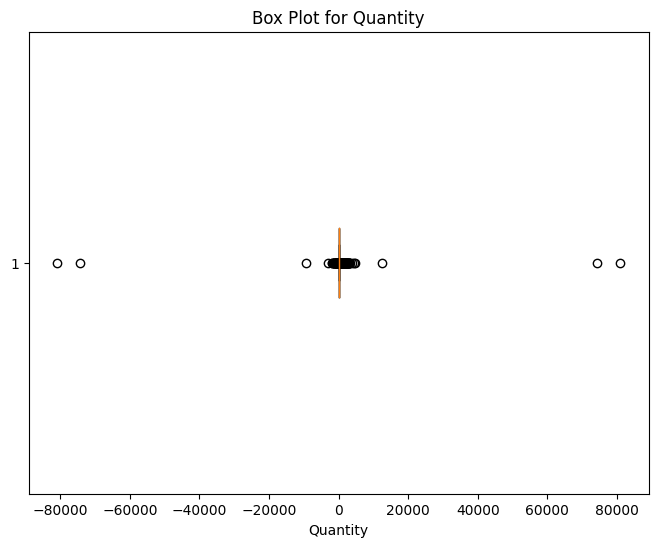

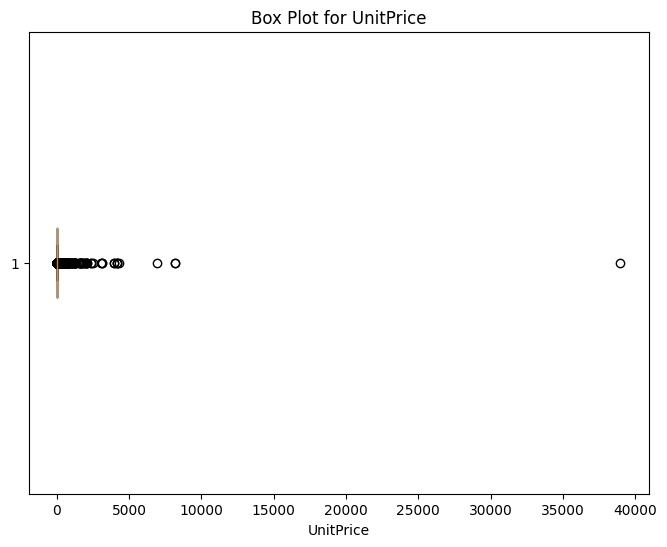

In [27]:
import matplotlib.pyplot as plt

# Create a separate box plot for Quantity
plt.figure(figsize=(8, 6))
plt.boxplot(data['Quantity'], vert=False)
plt.title('Box Plot for Quantity')
plt.xlabel('Quantity')
plt.show()

# Create a separate box plot for UnitPrice
plt.figure(figsize=(8, 6))
plt.boxplot(data['UnitPrice'], vert=False)
plt.title('Box Plot for UnitPrice')
plt.xlabel('UnitPrice')
plt.show()


5.2. Segment customers based on their purchase history (Consider factors like total purchases, frequency of purchases, etc.).



In [28]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,December


In [29]:
import pandas as pd

# Assuming you have a DataFrame 'df' containing the data
customer_metrics = data.groupby('CustomerID')['TotalPrice'].sum().reset_index()
# Define the segmentation criteria and labels
bins = [-float('inf'), 0, 1000, 2000, float('inf')]
labels = ['Negative/Zero-Spenders', 'Low-Spenders', 'Medium-Spenders', 'High-Spenders']

customer_metrics['PurchaseSegment'] = pd.cut(customer_metrics['TotalPrice'], bins=bins, labels=labels)

(-5000.0, 30000.0)

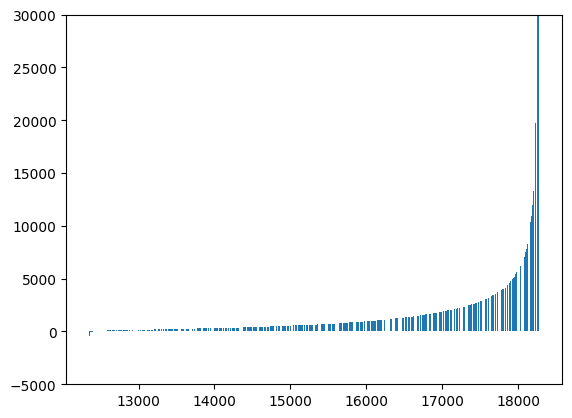

In [30]:
plt.bar(x=customer_metrics['CustomerID'],height=customer_metrics['TotalPrice'].sort_values())
ax = plt.gca()
ax.set_ylim([-5000, 30000])




In [31]:
plt.bar

<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

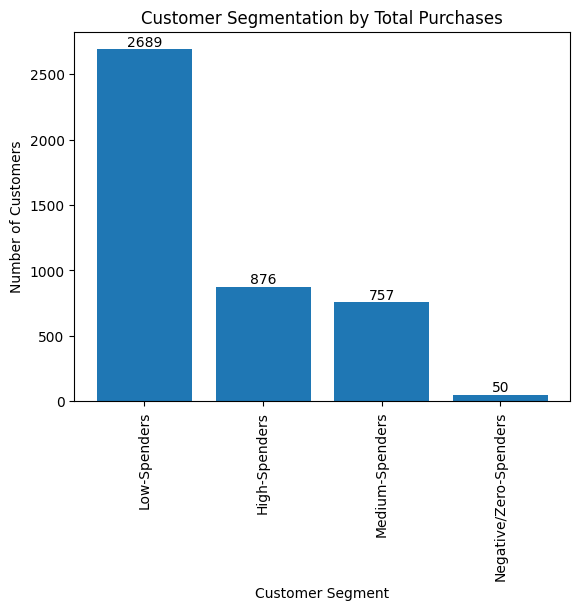

In [32]:
# Count the number of customers in each PurchaseSegment
segment_counts = customer_metrics['PurchaseSegment'].value_counts()

# Create a bar chart to visualize customer segments
plt.bar(segment_counts.index, segment_counts.values)
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.title('Customer Segmentation by Total Purchases')
# Add count labels on top of the bars
for i, count in enumerate(segment_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(rotation=90)

plt.show()

5.3. For the top 5 products (by quantity sold), visualize their monthly sales trend.



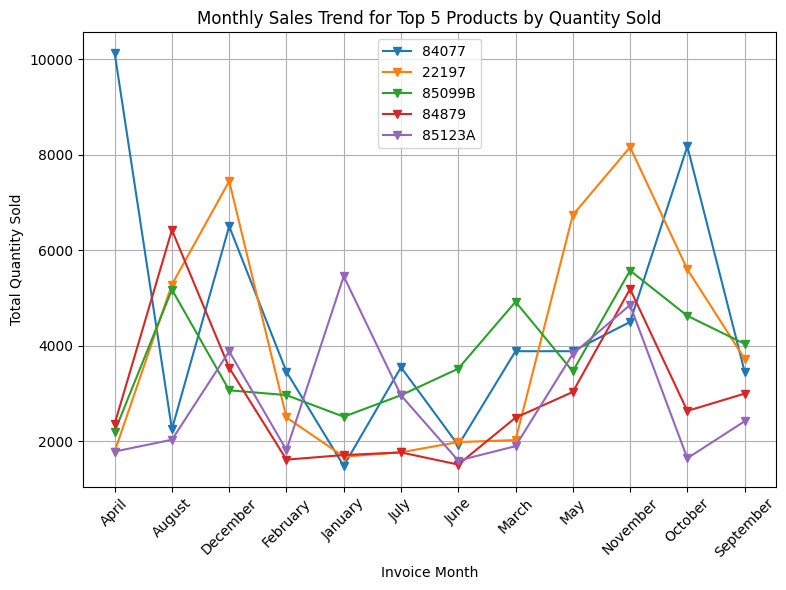

In [33]:
# Group by product description and invoice month, and calculate total quantity sold
monthly_sales = data.groupby(['StockCode', 'InvoiceMonth'])['Quantity'].sum().reset_index()

# Find the top 5 products by quantity sold
top_5_products = monthly_sales.groupby('StockCode')['Quantity'].sum().nlargest(5).index

# Filter the data for the top 5 products
top_5_monthly_sales = monthly_sales[monthly_sales['StockCode'].isin(top_5_products)]

# Create a line plot to visualize the monthly sales trend for the top 5 products
plt.figure(figsize=(8, 6))
for product in top_5_products:
    product_data = top_5_monthly_sales[top_5_monthly_sales['StockCode'] == product]
    plt.plot(product_data['InvoiceMonth'], product_data['Quantity'], marker='v', label=product)

plt.xlabel('Invoice Month')
plt.ylabel('Total Quantity Sold')
plt.title('Monthly Sales Trend for Top 5 Products by Quantity Sold')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


# Advanced Machine Learning Analysis with Retail Dataset



## 6. Feature Engineering:

6.1 Extract 'Year', 'Month', 'Day', and 'Hour' from the InvoiceDate and create separate columns for each.


In [34]:
# Extract 'Year', 'Month', 'Day', and 'Hour' and create separate columns for each
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day
data['Hour'] = data['InvoiceDate'].dt.hour

6.2 Create a new column `'ReturnFlag'` where if `'Quantity'` is less than zero, it's 1, otherwise 0. This will indicate whether an item was returned.


In [35]:
data['ReturnFlag'] = data['Quantity'].apply(lambda x: 1 if x < 0 else 0)

## 7. Customer Segmentation using Clustering:

7.1. Create a matrix RFM (Recency, Frequency, Monetary) for each customer:
- Recency: Number of days since the last purchase
- Frequency: Number of purchases
- Monetary: Total money spent

In [36]:
import warnings
warnings.filterwarnings("ignore")

In [37]:
# Recent max date as current date
current_date = data['InvoiceDate'].max()

# Creating column Recency, Frequency, Monetary  
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # For each customer calculating recent purchase days compared to maximum date of dataset
    'InvoiceNo': 'count',                                   # How much invoice has been made for each of the customer
    'TotalPrice': 'sum'                                      # Summation of all invoices
}).rename(columns={ 
    'InvoiceDate': 'Recency',   
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
})

rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,2,0.00
12347,1,182,4310.00
12348,74,31,1797.24
12349,18,73,1757.55
12350,309,17,334.40
...,...,...,...
18280,277,10,180.60
18281,180,7,80.82
18282,7,13,176.60


7.2. Normalize the RFM matrix with StandardScaler:

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm)
rfm_normalized


array([[ 2.32202285, -0.3917197 , -0.23100099],
       [-0.89373323,  0.38265697,  0.29343167],
       [-0.1691956 , -0.26695902, -0.01231622],
       ...,
       [-0.83418219, -0.34439668, -0.20951263],
       [-0.87388289,  2.85205812,  0.02390005],
       [-0.48680114, -0.0991774 , -0.00744423]])

7.3. Use KMeans clustering to segment customers into different groups. Determine the optimal number of clusters using the Elbow method.

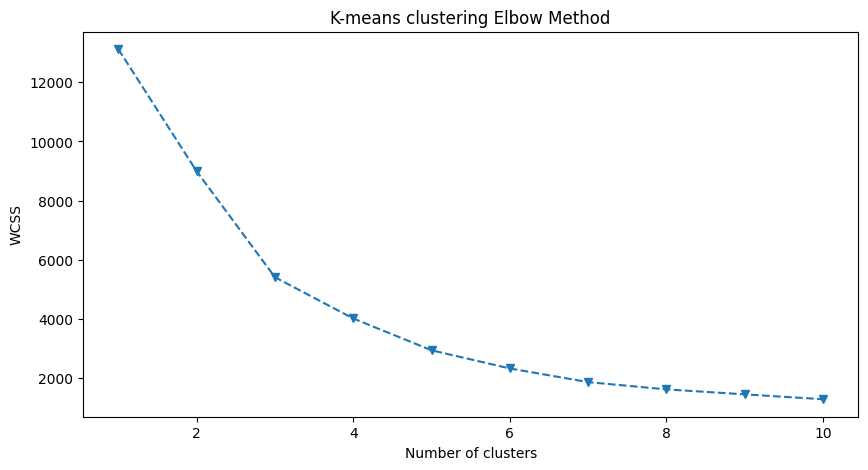

In [39]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_normalized)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='v', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('K-means clustering Elbow Method')
plt.show()

# Based on the elbow point, choose optimal clusters and run KMeans
optimal_clusters = 3  # this can change based on your elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(rfm_normalized)

rfm['Cluster'] = clusters

In [40]:
from sklearn.cluster import KMeans

# Fitting K Means to the Datatset using k = 3

kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(rfm_normalized)

rfm['Cluster_ID'] = y_kmeans

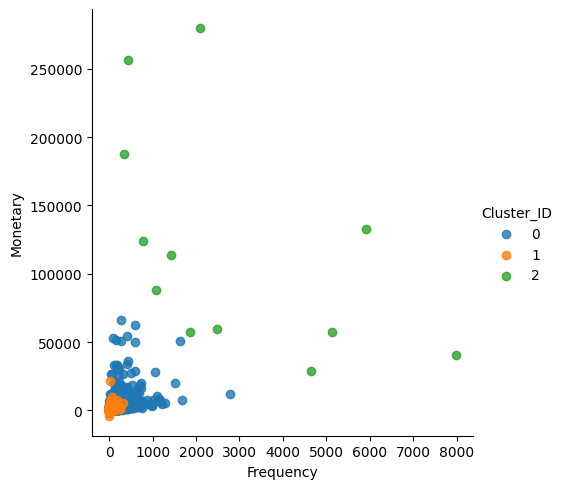

In [41]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

In [42]:
import plotly.express as px

fig = px.scatter_3d(rfm, x='Frequency', y='Monetary', z='Recency', color='Cluster_ID', hover_name = rfm.index )
fig.show()

## 8. Predictive Analytics:

8.1. Can you predict if a customer will return an item? Use the 'ReturnFlag' as the target variable and build a classification model.

- Split data into training and test sets.
- Use features like 'UnitPrice', 'Quantity', etc.
- Evaluate model accuracy, precision, recall, and F1-score.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

features = data[['UnitPrice', 'Quantity']] # you can add more features
target = data['ReturnFlag']

for col in ['InvoiceDate', 'InvoiceNo','StockCode', 'Description', 'Country', 'CustomerID']:
    if col in features.columns:  
        del features[col]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79656
           1       1.00      1.00      1.00      1710

    accuracy                           1.00     81366
   macro avg       1.00      1.00      1.00     81366
weighted avg       1.00      1.00      1.00     81366



8.2. Predict the `'TotalPrice'` for an invoice using regression models.
- Consider relevant features and handle categorical ones appropriately (e.g., with one-hot encoding).
- Split data, train the model, and evaluate its performance using metrics like MAE, RMSE, and R^2.

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# select only numeric columns
data_reg = data.select_dtypes('number')
# Assuming df has dummy variables for categorical columns
features = data_reg.drop(columns=['TotalPrice', 'CustomerID'])
target = data_reg['TotalPrice']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)

predictions = reg.predict(X_test)

print('RMSE:', mean_squared_error(y_test, predictions, squared=False))
print('R^2:', r2_score(y_test, predictions))

RMSE: 82.89388156193516
R^2: -0.07638463337320855


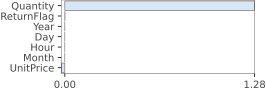

In [45]:
from rfpimp import *
I = importances(reg, X_train, y_train)
plot_importances(I)


## 9. Association Rule Mining:
- 9.1 Identify frequently bought products together. Use the Apriori algorithm to extract meaningful association rules.
- 9.2 Based on the rules, suggest product bundling strategies to the retail store.

In [46]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

sales_df = data[['InvoiceNo', 'StockCode','Description']]

oht = sales_df.groupby(['InvoiceNo', 'Description'])['StockCode'].count().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket_sets = oht.applymap(lambda x: True if x >= 1 else False)

frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)

association_rules_df = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

association_rules_df.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.036458,0.040874,0.024155,0.662546,16.209376,0.022665,2.842244,0.973810
1,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.040874,0.036458,0.024155,0.590959,16.209376,0.022665,2.355614,0.978294
2,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.028932,0.034565,0.021000,0.725857,20.999687,0.020000,3.521643,0.980755
3,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.034565,0.028932,0.021000,0.607562,20.999687,0.020000,2.474449,0.986478
4,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.033033,0.026634,0.021226,0.642565,24.126079,0.020346,2.723197,0.991296


# Advanced EDA Techniques:

11. Pareto Analysis (80/20 Rule):
- Identify the 20% of the products that generate 80% of the revenue.
- Conversely, identify the 20% of the customers responsible for 80% of the sales.    

In [48]:
# Assuming 'TotalPrice' is the column representing the total price of each product
# and 'CustomerID' represents the customer ID.

# Calculate the total revenue for each product
product_revenue = data.groupby('StockCode')['TotalPrice'].sum().reset_index()

# Sort products by revenue in descending order
product_revenue = product_revenue.sort_values(by='TotalPrice', ascending=False)

# Calculate the cumulative sum of revenue
product_revenue['CumulativeRevenue'] = product_revenue['TotalPrice'].cumsum()

# Calculate the total revenue of all products
total_revenue = product_revenue['TotalPrice'].sum()

# Find the threshold for the top 20% of products
revenue_threshold = total_revenue * 0.8

# Filter the products that contribute to 80% of revenue
top_20_percent_products = product_revenue[product_revenue['CumulativeRevenue'] <= revenue_threshold]

print("Top Products Generating 80% of Revenue:")
top_20_percent_products


Top Products Generating 80% of Revenue:


,StockCode,TotalPrice,CumulativeRevenue
1292,22423,132870.40,132870.40
3249,85123A,93979.20,226849.60
3235,85099B,83236.76,310086.36
2599,47566,67687.53,377773.89
3683,POST,66710.24,444484.13
...,...,...,...
613,21500,2593.00,6629509.10
644,21563,2591.02,6632100.12
1752,22906,2590.20,6634690.32
1895,23053,2589.90,6637280.22


In [49]:
# Now, identify the 20% of customers responsible for 80% of sales

# Calculate the total sales for each customer
customer_sales = data.groupby('CustomerID')['TotalPrice'].sum().reset_index()

# Sort customers by sales in descending order
customer_sales = customer_sales.sort_values(by='TotalPrice', ascending=False)

# Calculate the cumulative sum of sales
customer_sales['CumulativeSales'] = customer_sales['TotalPrice'].cumsum()

# Calculate the total sales of all customers
total_sales = customer_sales['TotalPrice'].sum()

# Find the threshold for the top 20% of customers
sales_threshold = total_sales * 0.8

# Filter the customers that contribute to 80% of sales
top_20_percent_customers = customer_sales[customer_sales['CumulativeSales'] <= sales_threshold]

print("Top Customers Responsible for 80% of Sales:")
top_20_percent_customers

Top Customers Responsible for 80% of Sales:


,CustomerID,TotalPrice,CumulativeSales
1703,14646,279489.02,279489.020
4233,18102,256438.49,535927.510
3758,17450,187482.17,723409.680
1895,14911,132572.62,855982.300
55,12415,123725.45,979707.750
...,...,...,...
3263,16762,1501.38,6633210.571
3846,17571,1498.51,6634709.081
2911,16279,1496.68,6636205.761
741,13320,1491.70,6637697.461


12. Time-Series Anomalies:
- Detect any anomalies or outliers in the sales data over time using rolling averages or other advanced methods.

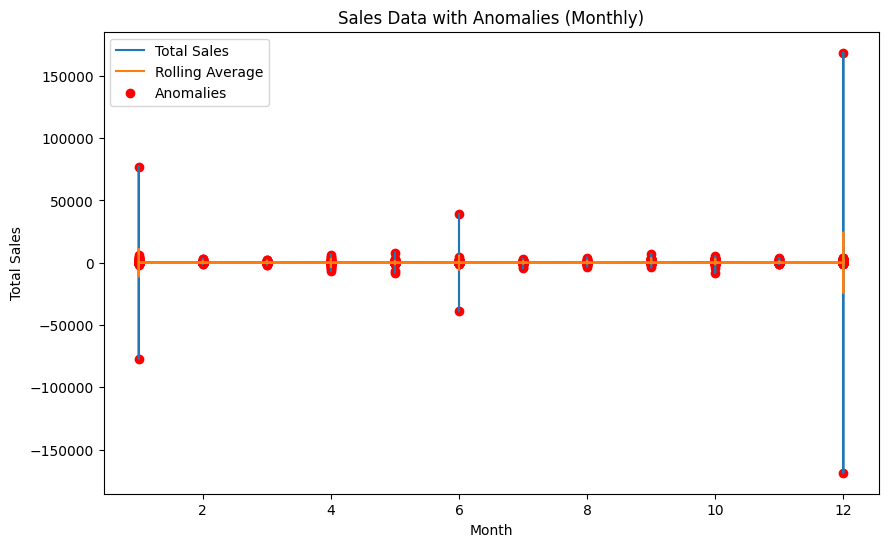

In [50]:
import matplotlib.pyplot as plt

data['RollingAverage'] = data['TotalPrice'].rolling(window=7).mean()  # Adjust the window size as needed

# Define a threshold for anomaly detection
threshold = 2.0  # You can adjust this based on your data and requirements

# Identify anomalies
data['Anomaly'] = (data['TotalPrice'] - data['RollingAverage']).abs() > threshold

plt.figure(figsize=(10, 6))
plt.plot(data['Month'], data['TotalPrice'], label='Total Sales')
plt.plot(data['Month'], data['RollingAverage'], label='Rolling Average')
plt.scatter(data['Month'][data['Anomaly']], data['TotalPrice'][data['Anomaly']], color='red', label='Anomalies')
plt.legend()
plt.title('Sales Data with Anomalies (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Advanced Modeling Techniques:

13. Market Basket Analysis Enhancements:
- Dig deeper into association rules. For instance, find rules with a high lift and high confidence.
- Analyze antecedents with more than one item, which can give bundled product suggestions.

<Axes: xlabel='support', ylabel='confidence'>

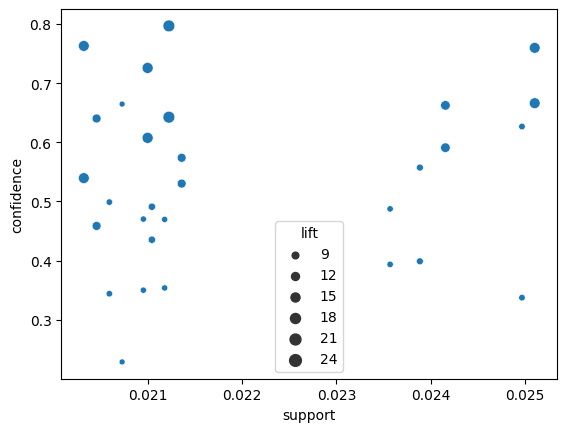

In [51]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.1)
top_rules = rules[rules['confidence'] > 0.01]
sns.scatterplot(x='support', y='confidence', size='lift', data=top_rules)



In [52]:
import pandas as pd
from mlxtend.frequent_patterns import association_rules

# Assuming you have a DataFrame called 'association_rules' with the specified columns
# Replace 'association_rules' with your actual DataFrame name

# Filter the rules with antecedents having more than one item
filtered_rules = association_rules_df[association_rules_df['antecedents'].apply(lambda x: len(x) >= 1)]

# Sort the rules by lift (or any other metric you prefer)
filtered_rules = filtered_rules.sort_values(by='lift', ascending=False)

# Display the top N bundled product suggestions
N = 10  # Change this value to the number of suggestions you want
top_suggestions = filtered_rules.head(N)

# Print the top bundled product suggestions
top_suggestions[['antecedents', 'consequents', 'lift']].reset_index(drop=True).head()

,antecedents,consequents,lift
0,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),24.126079
1,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),24.126079
2,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),20.999687
3,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),20.999687
4,(ROSES REGENCY TEACUP AND SAUCER ),(PINK REGENCY TEACUP AND SAUCER),20.255366


## 14. Product Recommendation Systems:
- Develop a system to recommend products to users.
- Consider collaborative filtering techniques, matrix factorization, or deep learning-based approaches like neural collaborative filtering.

In [53]:
from sklearn.metrics.pairwise import cosine_similarity

# Create a user-product matrix
user_product_matrix = data.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)
reindexed_user_product_matrix = user_product_matrix.reset_index()
# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(user_product_matrix)

# Get product recommendations for a user based on their purchase history
def get_recommendations(user_id, cosine_sim=cosine_sim):
    idx = reindexed_user_product_matrix[reindexed_user_product_matrix['CustomerID']==user_id].index[0]
    # Get pairwise similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort users based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get products bought by the most similar user
    user_idx = sim_scores[1][0]
    similar_user_products = user_product_matrix.iloc[user_idx]
    recommended_products = similar_user_products[similar_user_products > 0].index.tolist()

    return recommended_products

stockcodelist = get_recommendations(13113.0) # Replace 2154 with an actual CustomerID
print(f"Stockcode list for recommended products are - {stockcodelist}")

Stockcode list for recommended products are - ['22087', '22668', '47566', '47566B']


## 15. Churn Prediction:
- Predict if a customer will stop buying products in the near future.
- Features can include Recency, Frequency, Monetary values, average time between purchases, total categories bought, etc.

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# For this example, let's assume if a customer hasn't purchased in the last 6 months, they've churned
df = data.copy()
df['LastPurchase'] = df.groupby('CustomerID')['InvoiceDate'].transform('max')
max_date = df['InvoiceDate'].max()
df['Churn'] = (max_date - df['LastPurchase']).dt.days > 180

X = df[['TotalPrice', 'Quantity']] # Add more relevant features
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.95      1.00      0.97    115659
        True       0.00      0.00      0.00      6390

    accuracy                           0.95    122049
   macro avg       0.47      0.50      0.49    122049
weighted avg       0.90      0.95      0.92    122049



## 16. Hyperparameter Tuning and Model Optimization:
- For any given machine learning model you use, apply techniques like grid search or random search for hyperparameter tuning.
- Use ensemble methods (e.g., stacking, bagging, boosting) to enhance prediction performance.

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2']
}

grid = GridSearchCV(LogisticRegression(), param_grid, verbose=3)
grid.fit(X_train, y_train)

print(grid.best_params_)

grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .................C=0.1, penalty=l2;, score=0.946 total time=   0.2s
[CV 2/5] END .................C=0.1, penalty=l2;, score=0.946 total time=   0.2s
[CV 3/5] END .................C=0.1, penalty=l2;, score=0.946 total time=   0.3s
[CV 4/5] END .................C=0.1, penalty=l2;, score=0.946 total time=   0.2s
[CV 5/5] END .................C=0.1, penalty=l2;, score=0.946 total time=   0.3s
[CV 1/5] END ...................C=1, penalty=l2;, score=0.946 total time=   0.2s
[CV 2/5] END ...................C=1, penalty=l2;, score=0.946 total time=   0.2s
[CV 3/5] END ...................C=1, penalty=l2;, score=0.946 total time=   0.3s
[CV 4/5] END ...................C=1, penalty=l2;, score=0.946 total time=   0.2s
[CV 5/5] END ...................C=1, penalty=l2;, score=0.946 total time=   0.3s
[CV 1/5] END ..................C=10, penalty=l2;, score=0.946 total time=   0.2s
[CV 2/5] END ..................C=10, penalty=l2;,